<a href="https://colab.research.google.com/github/Kaustubh-20/ML_Practice/blob/main/CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT NECESSARY LIBRARIES**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

**LOADING THE DATASET**

---



In [ ]:
ds = pd.read_csv('/content/german_credit_data.csv')

In [ ]:
ds.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [ ]:
ds.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


**EXPLORATORY DATA ANALYSIS**

---



Dropping useless columns

In [ ]:
ds.drop(['Unnamed: 0','Saving accounts', 'Checking account'],axis=1,inplace=True)

In [ ]:
ds.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose
0,67,male,2,own,1169,6,radio/TV
1,22,female,2,own,5951,48,radio/TV
2,49,male,1,own,2096,12,education
3,45,male,2,free,7882,42,furniture/equipment
4,53,male,2,free,4870,24,car


In [ ]:
ds.isna().sum()

Age              0
Sex              0
Job              0
Housing          0
Credit amount    0
Duration         0
Purpose          0
dtype: int64

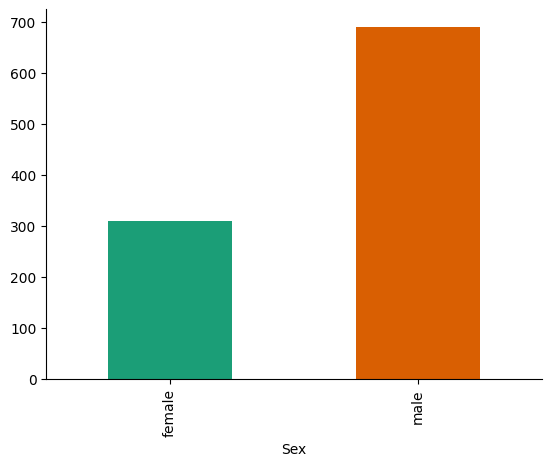

In [ ]:
# @title SEX
ds.groupby('Sex').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

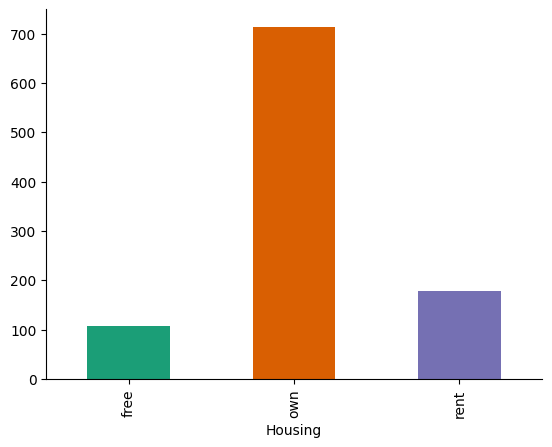

In [ ]:
# @title HOUSING
ds.groupby('Housing').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

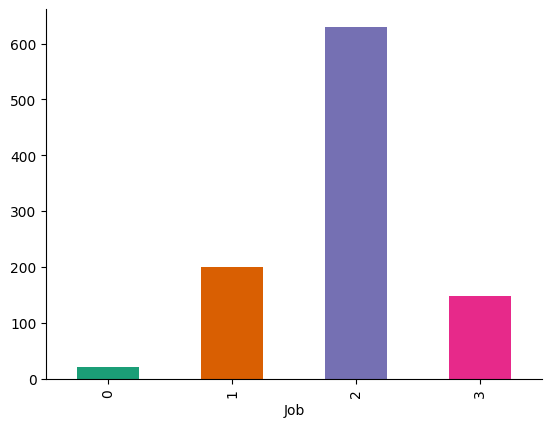

In [ ]:
# @title JOB
ds.groupby('Job').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

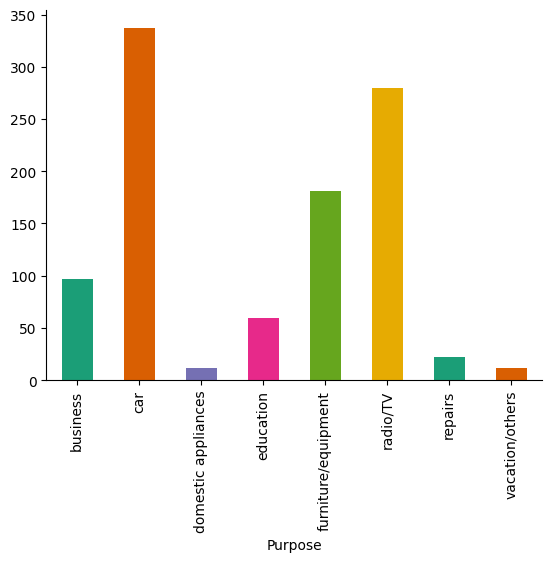

In [ ]:
# @title PURPOSE
ds.groupby('Purpose').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#The use of credit card has been done mostly for the purpose of buying CARS, RADIO/TV, FURNITURE/EQUIPMENT.

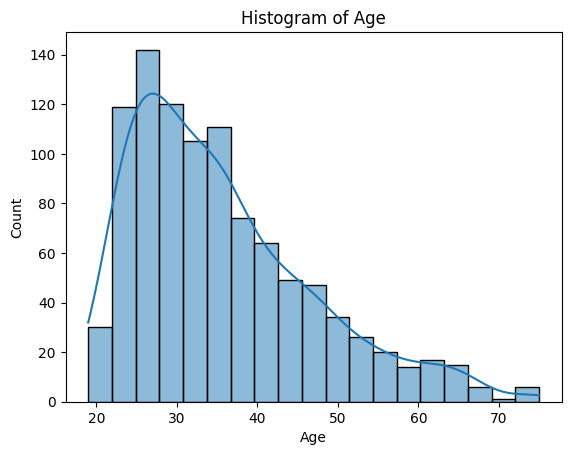

In [ ]:
sns.histplot(data=ds,x='Age',kde=True)
plt.title('Histogram of Age')
plt.show()

#People aged 26-28 use credit card the most, making them the ideal target audience. Also people lying in between age group 22-36 should be targeted as contribute the most.

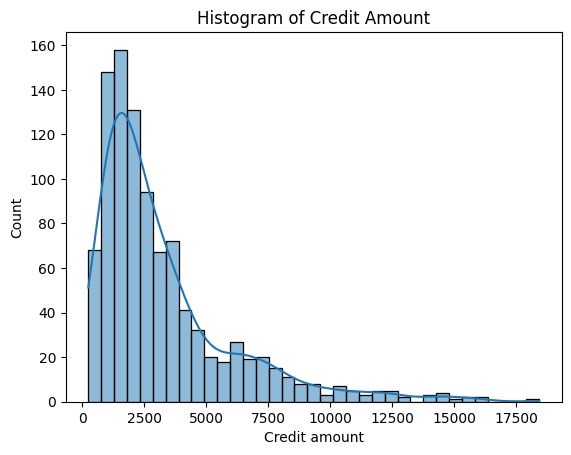

In [ ]:
sns.histplot(data=ds,x='Credit amount',kde=True)
plt.title('Histogram of Credit Amount')
plt.show()

#1500-2500 is the amount generally credited by people.

**PRE-PROCESSING**

---



In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_attribs = ['Age','Job','Saving accounts','Credit amount','Duration']
cat_attribs = ['Sex','Housing']
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())
preprocessing = ColumnTransformer([
    ('num',num_pipeline,num_attribs),('cat',cat_pipeline,cat_attribs)
])

In [ ]:
ds['Sex']= ds['Sex'].astype('category')
ds['Sex']= ds['Sex'].cat.codes

In [ ]:
ds['Housing']= ds['Housing'].astype('category')
ds['Housing']= ds['Housing'].cat.codes

In [ ]:
ds.drop('Purpose',axis=1,inplace=True)

In [ ]:
ds.head()

,Age,Sex,Job,Housing,Credit amount,Duration
0,67,1,2,1,1169,6
1,22,0,2,1,5951,48
2,49,1,1,1,2096,12
3,45,1,2,0,7882,42
4,53,1,2,0,4870,24


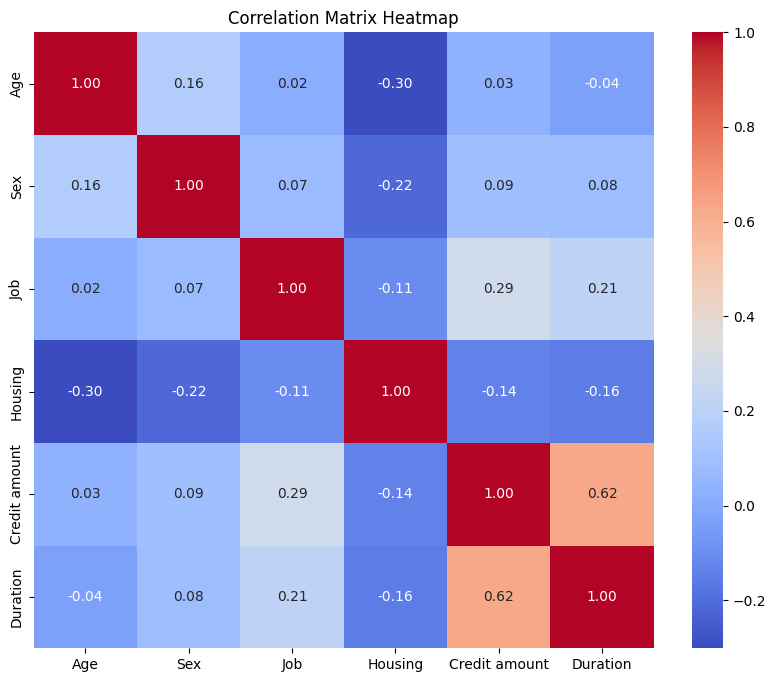

In [ ]:
correlation_matrix = ds.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**The correlation is maximum between Credit amount and Duration, hence we select them as the features for the clustering.**

In [ ]:
german = ds.copy()

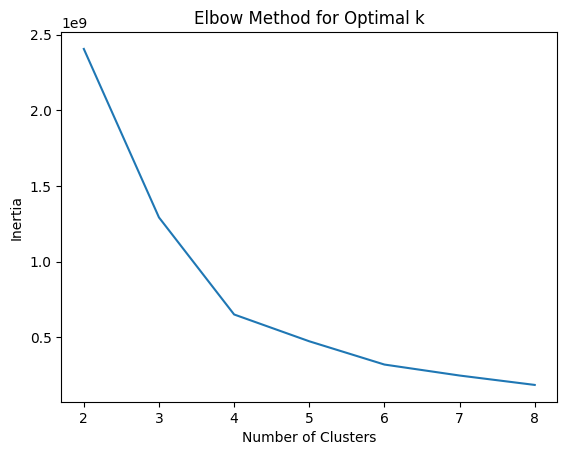

In [ ]:
inertias = []
n_clusters = [2, 3, 4, 5, 6, 7, 8]

for cluster in n_clusters:
    kmeans_german = make_pipeline(PCA(n_components=2), KMeans(n_clusters=cluster, n_init='auto', random_state=42))
    kmeans_german.fit(ds)
    inertias.append(kmeans_german['kmeans'].inertia_)

plt.plot(n_clusters, inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

**The optimum number of clusters can be 3 or 4.**

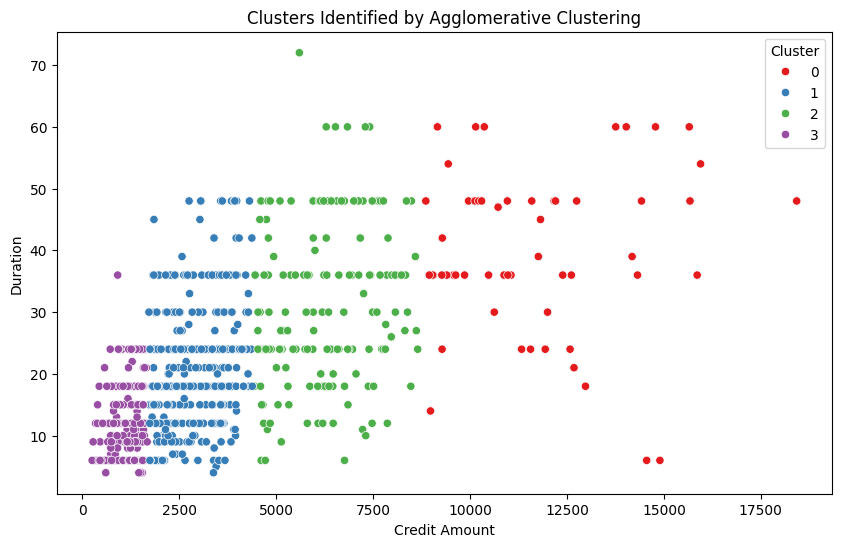

In [ ]:
n_clusters = 4
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)

cluster_labels = agg_cluster.fit_predict(german[['Credit amount', 'Duration']])

german['Cluster'] = cluster_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=german, x='Credit amount', y='Duration', hue='Cluster', palette='Set1', legend='full')
plt.title('Clusters Identified by Agglomerative Clustering')
plt.xlabel('Credit Amount')
plt.ylabel('Duration')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

cluster_labels = kmeans.fit_predict(german[['Credit amount', 'Duration']])

german['Cluster'] = cluster_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=german, x='Credit amount', y='Duration', hue='Cluster', palette='Set1', legend='full')
plt.title('Clusters Identified by K-means Clustering')
plt.xlabel('Credit Amount')
plt.ylabel('Duration')
plt.show()

In [ ]:
count_table = german.groupby('Cluster').size().reset_index(name='Count')
print(count_table)

**Cluster 1 and 3 are more densely packed.**

In [ ]:
summary_table = german.groupby('Cluster').agg({'Credit amount': 'mean',
                                               'Duration': 'mean',
                                               'Age': 'mean'})

summary_table.columns = ['Credit Amount Mean', 'Duration Mean', 'Age Mean']

print(summary_table)

INFERENCE
*   **Credit amount upto 2000 is generally taken for period of maximum 25 months.(CLUSTER 1)**

*   **Credits ranging from 2000 to 4000 are typically taken for periods of 10 to 50 months(CLUSTER 2)**


*   **Credit amounts ranging from 4000 to 9000 are typically borrowed for periods spanning 15 to 50 months, although some people opt for durations falling between 10 and 15 months, as well as 60 to 70 months.(CLUSTER 3)**

*   **Credit amounts ranging from 9000 to 17500 are typically borrowed for periods of 35+ months, with some outliers having the duration between 5-35 months. (CLUSTER 4)**


